In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Project/2023/BIGCON/

/content/drive/MyDrive/Project/2023/BIGCON


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import geopandas as gpd

In [ ]:
subway = gpd.read_file('수도권 지하철 공간데이터/2019/TB_O_SB_STATN_2019.shp', encoding = 'cp949')
subway.head(2)

,ID,STN_IDN,TGRP_CODE,STN_NM,BB_RT,US_YY_DD,TM_X,TM_Y,geometry
0,103.0,416,지하철,미아사거리,4,201911,202653.1120,557083.2120,POINT (202653.112 557083.212)
1,104.0,417,지하철,길음,4,201911,202211.9992,555986.0728,POINT (202211.999 555986.073)


In [ ]:
college = gpd.read_file('서울시 대학교 공간데이터/2020/TL_UNIV_2020.shp', encoding = 'cp949')
college.head(2)

,UNIV_ID,STDR_YEAR,ELSM,UNIV_CD,UNIV_NM,BNHH_SN,UNIV_STTUS,LC,FOND,OLD_ZIP,ADRES,ENRL_ST_SM,ENRL_ST_CN,TMPABSSKL,TCHER_CN,TM_X,TM_Y,geometry
0,48110001.0,202004,대학원,NaN,가톨릭대학교교회음악대학원,제3캠퍼스,기존,서울,사립,03083,"서울특별시종로구창경궁로296-12(혜화동,가톨릭대학교성신교정)",0.0,0.0,0.0,0.0,200377.582826,554053.289913,POINT (200377.583 554053.290)
1,48110002.0,202004,대학원,NaN,가톨릭대학교보건대학원,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",0.0,0.0,0.0,0.0,200563.146912,544622.519540,POINT (200563.147 544622.520)


In [ ]:
college['ELSM'].unique()

array(['대학원', '대학', '대학원대학', '전문대학'], dtype=object)

In [ ]:
college = college[college['ELSM'] != '대학원']

In [ ]:
college.shape

(89, 18)

In [ ]:
seoul_pnu = gpd.read_file('서울시_필지_LX맵/서울시_필지전체.shp', encoding = 'cp949')
seoul_pnu.head(2)

,PNU,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry
0,1111010100100010000,11110,종로구,11110101,청운동,"POLYGON ((197211.824 554668.412, 197240.351 55..."
1,1111010100100010001,11110,종로구,11110101,청운동,"POLYGON ((197300.251 554580.847, 197298.254 55..."


In [ ]:
seoul_pnu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919736 entries, 0 to 919735
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PNU       919736 non-null  object  
 1   SGG_CD    919736 non-null  object  
 2   SGG_NM    919736 non-null  object  
 3   EMD_CD    919736 non-null  object  
 4   EMD_NM    919735 non-null  object  
 5   geometry  919736 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 42.1+ MB


In [ ]:
seoul_pnu = seoul_pnu.astype({'PNU' : 'int'})
seoul_pnu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919736 entries, 0 to 919735
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PNU       919736 non-null  int64   
 1   SGG_CD    919736 non-null  object  
 2   SGG_NM    919736 non-null  object  
 3   EMD_CD    919736 non-null  object  
 4   EMD_NM    919735 non-null  object  
 5   geometry  919736 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 42.1+ MB


In [ ]:
raw_df = pd.read_csv('필지단위 소상공인 매출등급 정보.csv', encoding = 'cp949')
raw_df.head(2)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD
0,202201,1111010100100030100,11110101,A03,4
1,202201,1111010100100480000,11110101,A01,2


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156040 entries, 0 to 1156039
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   DATA_CRTR_YM  1156040 non-null  int64 
 1   LT_UNQ_NO     1156040 non-null  int64 
 2   STDG_EMD_CD   1156040 non-null  int64 
 3   INDUSTRY_CD   1156040 non-null  object
 4   SLS_GRD       1156040 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 44.1+ MB


In [ ]:
raw_df2 = raw_df.rename(columns = {'LT_UNQ_NO' : 'PNU'})
raw_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156040 entries, 0 to 1156039
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   DATA_CRTR_YM  1156040 non-null  int64 
 1   PNU           1156040 non-null  int64 
 2   STDG_EMD_CD   1156040 non-null  int64 
 3   INDUSTRY_CD   1156040 non-null  object
 4   SLS_GRD       1156040 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 44.1+ MB


In [ ]:
raw_df3 = raw_df2.drop_duplicates(subset = 'PNU', keep = 'first', ignore_index = True)
raw_df3 = raw_df3[['PNU']]
raw_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74303 entries, 0 to 74302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PNU     74303 non-null  int64
dtypes: int64(1)
memory usage: 580.6 KB


In [ ]:
df = pd.merge(left = seoul_pnu, right = raw_df3, how = 'right', on = 'PNU')
df.head(2)

,PNU,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry
0,1111010100100030100,11110,종로구,11110101,청운동,"POLYGON ((197073.176 554737.046, 197092.636 55..."
1,1111010100100480000,11110,종로구,11110101,청운동,"POLYGON ((197305.633 554178.725, 197306.531 55..."


In [ ]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74303 entries, 0 to 74302
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PNU       74303 non-null  int64   
 1   SGG_CD    74199 non-null  object  
 2   SGG_NM    74199 non-null  object  
 3   EMD_CD    74199 non-null  object  
 4   EMD_NM    74199 non-null  object  
 5   geometry  74199 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 4.0+ MB


## 필지가 대학교를 포함하고 있는지 여부

In [ ]:
college['buffer'] = college.convex_hull.buffer(500)

In [ ]:
college.head(1)

,UNIV_ID,STDR_YEAR,ELSM,UNIV_CD,UNIV_NM,BNHH_SN,UNIV_STTUS,LC,FOND,OLD_ZIP,ADRES,ENRL_ST_SM,ENRL_ST_CN,TMPABSSKL,TCHER_CN,TM_X,TM_Y,geometry,buffer
9,48110010.0,202004,대학,7001337,가톨릭대학교,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",836.0,807.0,29.0,884.0,200563.146912,544622.51954,POINT (200563.147 544622.520),"POLYGON ((201063.147 544622.520, 201060.739 54..."


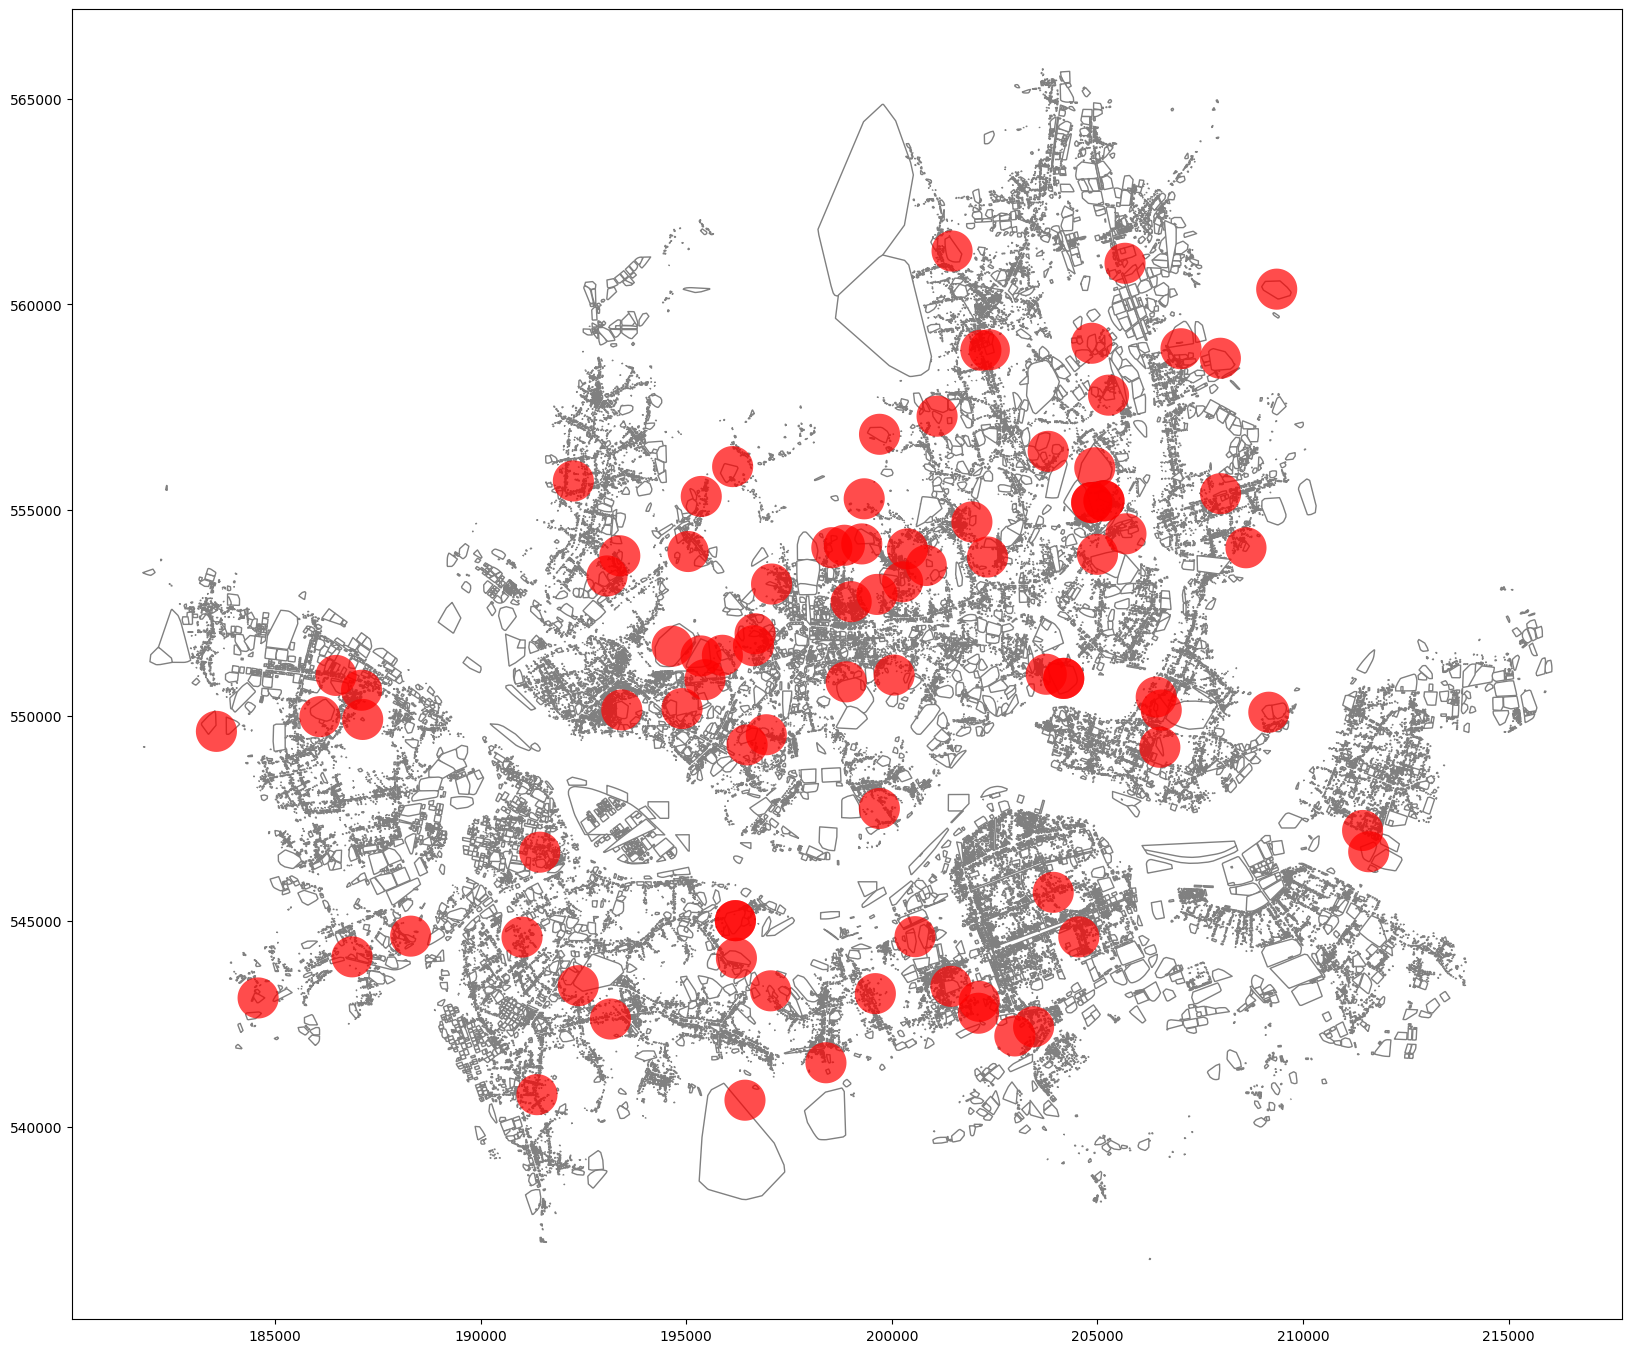

In [ ]:
ax = df.convex_hull.plot(figsize = (20, 20), color='white', edgecolor='gray')
college['buffer'].convex_hull.plot(ax = ax, color = 'red', alpha = 0.7)
plt.show()

contains 참고

https://rightstone032.tistory.com/11

버퍼 포함 여부 예시

https://foss4g.tistory.com/1662

In [ ]:
result = df['geometry'].apply(lambda x: college['buffer'].within(x))

TypeError: ignored

## 필지별 지하철역 개수 count

In [ ]:
ax = df.convex_hull.plot(figsize = (20, 20), color='white', edgecolor='gray')
subway.convex_hull.plot(ax = ax, color = 'blue')
plt.show()